In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
data=pd.read_csv('house price.csv')
data
data_encoded = pd.get_dummies(data, columns=['living area', 'location'], drop_first=True)
X = data_encoded.drop('purchase price', axis=1)
y = data_encoded['purchase price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  # Diagonal line
plt.xlabel('Actual Purchase Price')
plt.ylabel('Predicted Purchase Price')
plt.title('Actual vs Predicted Purchase Price')
plt.show()

new_house = {
    'no. of bedrooms': 3,
    'area of plot': 2000,
    
    'living area_slum': 0,
    
    'location_hiran magri': 0,
    'location_sitapura': 1,
    'location_shanti nagar': 0,
    'location_sanganer': 0
}


new_data = pd.DataFrame(columns=X.columns)
new_data.loc[0] = 0 

for col, val in new_house.items():
    if col in new_data.columns:
        new_data.at[0, col] = val
    else:
        print(f"Warning: {col} not found in model features")


predicted_price = model.predict(new_data)

print(f"Predicted Purchase Price: {predicted_price[0]:,.2f}")



In [60]:
data=pd.read_csv('house price.csv')

In [61]:
data

,living area,location,no. of bedrooms,area of plot,purchase price
0,slum,high street,5,1000000,2500000
1,city,hiran magri,4,20000,400000
2,slum,shanti nagar,4,30000,500000
3,city,sitapura,3,2000,600000
4,city,sanganer,4,500000,6000000


In [62]:
data_encoded = pd.get_dummies(data, columns=['living area', 'location'], drop_first=True)

In [63]:
X = data_encoded.drop('purchase price', axis=1)
y = data_encoded['purchase price']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [65]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(X_test)

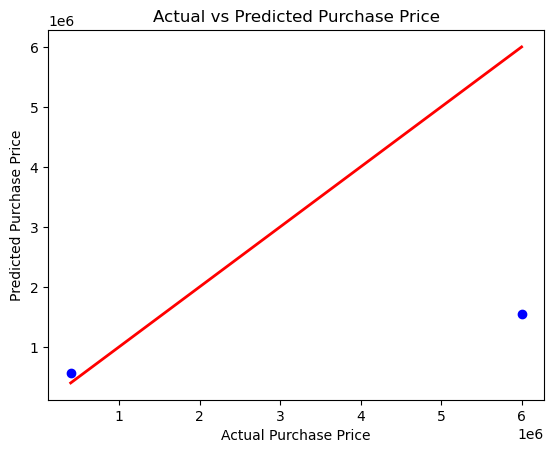

In [67]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  # Diagonal line
plt.xlabel('Actual Purchase Price')
plt.ylabel('Predicted Purchase Price')
plt.title('Actual vs Predicted Purchase Price')
plt.show()


In [70]:
# Define new house features (use exact dummy columns from your model)
new_house = {
    'no. of bedrooms': 3,
    'area of plot': 2000,
    # Dummy variables for living area (assuming 'city' was dropped by drop_first=True)
    'living area_slum': 0,
    # Dummy variables for location (adjust these according to your actual columns)
    'location_hiran magri': 0,
    'location_sitapura': 1,
    'location_shanti nagar': 0,
    'location_sanganer': 0
}

# Create a DataFrame with all features zeroed
new_data = pd.DataFrame(columns=X.columns)
new_data.loc[0] = 0  # initialize all to zero

# Update with new house values
for col, val in new_house.items():
    if col in new_data.columns:
        new_data.at[0, col] = val
    else:
        print(f"Warning: {col} not found in model features")

# Predict purchase price
predicted_price = model.predict(new_data)

print(f"Predicted Purchase Price: {predicted_price[0]:,.2f}")


Predicted Purchase Price: 600,000.00
